In [5]:
import pandas as pd

In [6]:
df=pd.read_csv("C:/Users/Admin/Desktop/heart.csv")

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
df.isnull().count()

age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64

In [10]:
import matplotlib.pyplot as plt

In [11]:
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif',# color=black_grad[0])
plt.pie(df['sex'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

SyntaxError: positional argument follows keyword argument (1066385072.py, line 7)

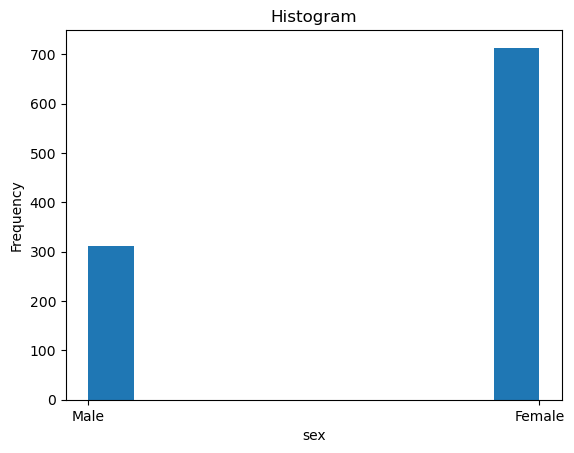

In [15]:

plt.hist(df['sex'],bins=10)
plt.xlabel('sex')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.xticks([0,1],['Male','Female'])
plt.show()

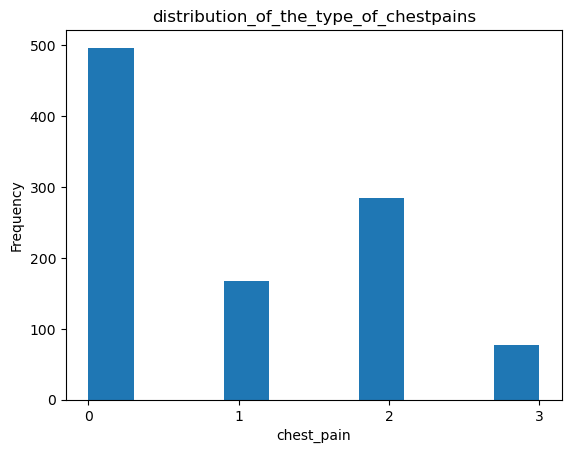

In [20]:
plt.hist(df['cp'],bins=10)
plt.xlabel('chest_pain')
plt.ylabel('Frequency')
plt.title('distribution_of_the_type_of_chestpains')
plt.xticks([0,1,2,3]),['type 0','type 1',"type 2",'type 3']
#for i in range(len('cp')):
 #   plt.text(x=bins[i]+0.1, y=n[i]+0.1, s=int(n[i]))
plt.show()

In [21]:
gender_counts = df.groupby('sex')['target'].sum()

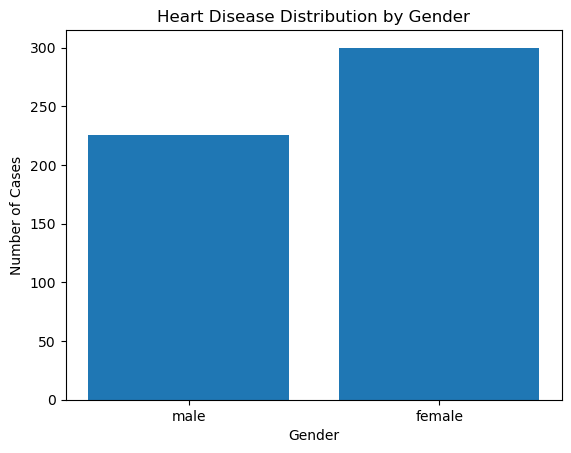

In [23]:
plt.bar(gender_counts.index, gender_counts)
plt.title('Heart Disease Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.xticks([0,1],['male','female'])
plt.show()

In [24]:
df=df.drop(columns=['cp','thal','slope'])

In [25]:
x=df.drop(['target'],axis=1)
y=df['target']


In [27]:
#data normalization
from sklearn.preprocessing import MinMaxScaler
x=MinMaxScaler().fit_transform(x)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [30]:
from sklearn.linear_model import LogisticRegression
LRclassifier=LogisticRegression(max_iter=1000,random_state=1,solver='liblinear',penalty='l1')
LRclassifier.fit(x_train,y_train)
y_pred_LR=LRclassifier.predict(x_test)

In [32]:
# --- LR Accuracy ---
from sklearn.metrics import classification_report, accuracy_score
LRAcc = accuracy_score(y_pred_LR, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.')


.:. Logistic Regression Accuracy: 79.51% .:.


In [33]:
# --- LR Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_LR))


.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       107
           1       0.74      0.88      0.80        98

    accuracy                           0.80       205
   macro avg       0.80      0.80      0.79       205
weighted avg       0.81      0.80      0.79       205



In [35]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier=RandomForestClassifier(n_estimators=1000,random_state=1,max_leaf_nodes=20,min_samples_split=15)
RFclassifier.fit(x_train,y_train)
y_pred_RF=RFclassifier.predict(x_test)

In [37]:
# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF))


.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       107
           1       0.85      0.92      0.88        98

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.89      0.88      0.88       205



In [38]:
from sklearn.svm import SVC
# --- Applying SVM ---
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
SVMclassifier.fit(x_train, y_train)

y_pred_SVM = SVMclassifier.predict(x_test)

C:\Users\Admin\anaconda32\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [40]:
# --- SVM Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_SVM))




.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       107
           1       0.74      0.89      0.81        98

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

